In [104]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [395]:
df = pd.read_csv("C:\\Users\\İdris Aydın\\Desktop\\heart_attack_dataset.csv")
df

,Gender,Age,Blood Pressure (mmHg),Cholesterol (mg/dL),Has Diabetes,Smoking Status,Chest Pain Type,Treatment
0,Male,70,181,262,No,Never,Typical Angina,Lifestyle Changes
1,Female,55,103,253,Yes,Never,Atypical Angina,Angioplasty
2,Male,42,95,295,Yes,Current,Typical Angina,Angioplasty
3,Male,84,106,270,No,Never,Atypical Angina,Coronary Artery Bypass Graft (CABG)
4,Male,86,187,296,Yes,Current,Non-anginal Pain,Medication
...,...,...,...,...,...,...,...,...
995,Male,42,125,193,Yes,Current,Typical Angina,Angioplasty
996,Male,80,186,267,Yes,Never,Atypical Angina,Coronary Artery Bypass Graft (CABG)
997,Female,64,108,174,Yes,Current,Non-anginal Pain,Coronary Artery Bypass Graft (CABG)
998,Female,84,123,195,No,Current,Asymptomatic,Lifestyle Changes


In [396]:
df.drop('Chest Pain Type', axis = 1, inplace = True)
df.drop('Treatment', axis = 1, inplace = True)
df

,Gender,Age,Blood Pressure (mmHg),Cholesterol (mg/dL),Has Diabetes,Smoking Status
0,Male,70,181,262,No,Never
1,Female,55,103,253,Yes,Never
2,Male,42,95,295,Yes,Current
3,Male,84,106,270,No,Never
4,Male,86,187,296,Yes,Current
...,...,...,...,...,...,...
995,Male,42,125,193,Yes,Current
996,Male,80,186,267,Yes,Never
997,Female,64,108,174,Yes,Current
998,Female,84,123,195,No,Current


In [383]:
sns.set_theme(rc={'grid.linewidth': 2}, context= 'talk')

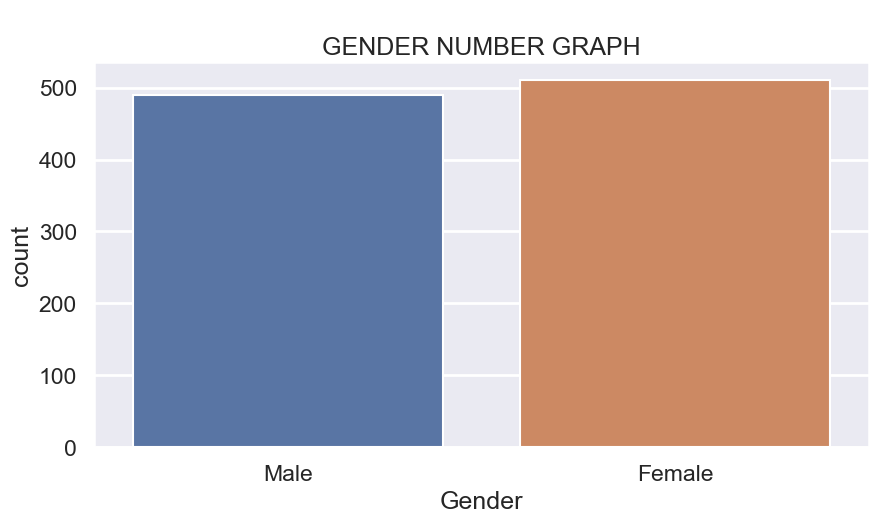

In [384]:
plt.figure(figsize = (10,5))

sns.countplot(x = 'Gender', hue = 'Gender', data = df)
plt.title("\nGENDER NUMBER GRAPH")

plt.show()

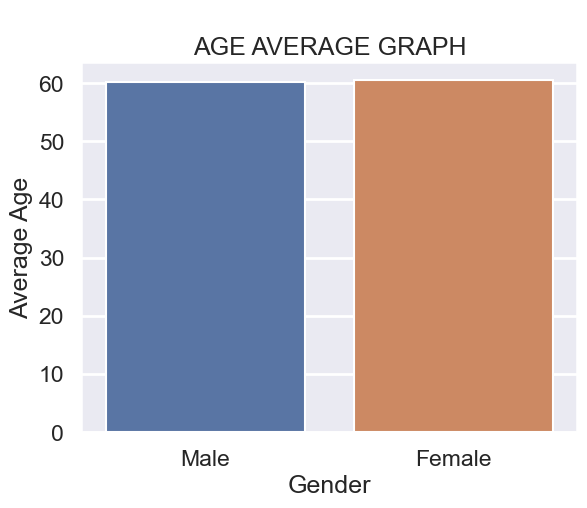

In [385]:
maleAgeAverage = round(df.groupby('Gender')['Age'].mean()['Male'], 2)
femaleAgeAverage = round(df.groupby('Gender')['Age'].mean()['Female'], 2)

genderAgeAverages = pd.DataFrame({
    'Gender': ['Male', 'Female'],
    'Average Age': [maleAgeAverage, femaleAgeAverage]
})

sns.barplot(x = 'Gender', y = 'Average Age', hue = 'Gender', data = genderAgeAverages)
plt.title("\nAGE AVERAGE GRAPH")
plt.show()

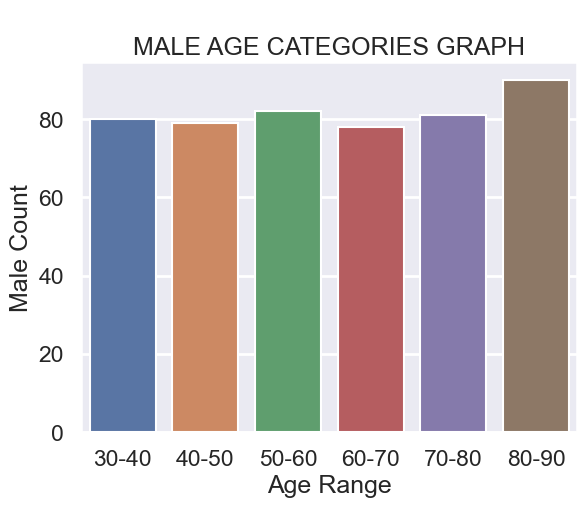

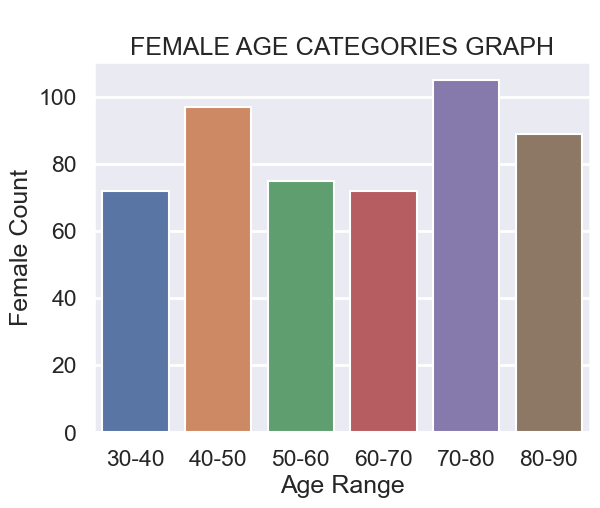

In [386]:
maleAgeCategories = []
femaleAgeCategories = []

for i in range(30, 90, 10):
    m = len(df[(df['Gender'] == 'Male') & ((df['Age'] >= i) & (df['Age'] < i + 10))])
    f = len(df[(df['Gender'] == 'Female') & ((df['Age'] >= i) & (df['Age'] < i + 10))])
    maleAgeCategories.append(m)
    femaleAgeCategories.append(f)

data = pd.DataFrame({
    'Age Range': ['30-40', '40-50', '50-60', '60-70','70-80','80-90'],
    'Male Count': maleAgeCategories,
    'Female Count': femaleAgeCategories
})   
data

sns.barplot(x = 'Age Range', y = 'Male Count', data = data, hue = 'Age Range')
plt.title("\nMALE AGE CATEGORIES GRAPH")
plt.show()

sns.barplot(x = 'Age Range', y = 'Female Count', data = data, hue = 'Age Range')
plt.title("\nFEMALE AGE CATEGORIES GRAPH")
plt.show()

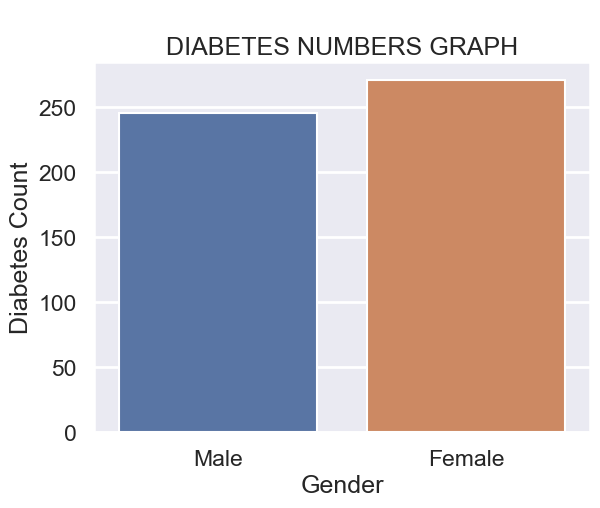

In [387]:
maleDiabetes = len(df[(df['Gender'] == 'Male') & (df['Has Diabetes'] == 'Yes')])
femaleDiabetes = len(df[(df['Gender'] == 'Female') & (df['Has Diabetes'] == 'Yes')])

data = pd.DataFrame({
    'Gender': ['Male', 'Female'],
    'Diabetes Count': [maleDiabetes, femaleDiabetes]
})

sns.barplot(x = 'Gender', y = 'Diabetes Count', hue = 'Gender', data = data)
plt.title('\nDIABETES NUMBERS GRAPH')

plt.show()

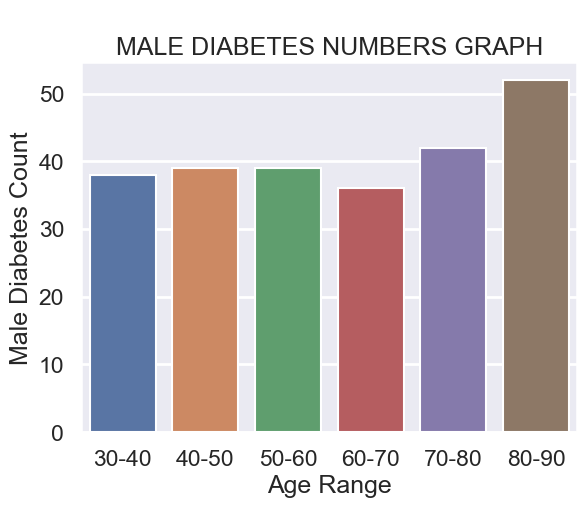

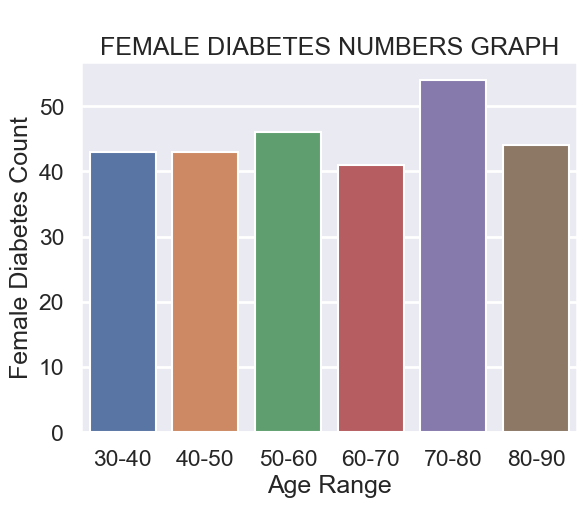

In [388]:
maleDiabetesNumbers = []
femaleDiabetesNumbers = []

for i in range(30, 90, 10):
    m = len(df[(df['Gender'] == 'Male') & ((df['Age'] >= i) & (df['Age'] < i + 10)) & (df['Has Diabetes'] == 'Yes')])
    f = len(df[(df['Gender'] == 'Female') & ((df['Age'] >= i) & (df['Age'] < i + 10)) & (df['Has Diabetes'] == 'Yes')])
    maleDiabetesNumbers.append(m)
    femaleDiabetesNumbers.append(f)

data = pd.DataFrame({
    'Age Range': ['30-40', '40-50', '50-60', '60-70', '70-80', '80-90'],
    'Male Diabetes Count': maleDiabetesNumbers,
    'Female Diabetes Count': femaleDiabetesNumbers
})    

data

sns.barplot(x = 'Age Range', y = 'Male Diabetes Count', hue = 'Age Range', data = data)
plt.title("\nMALE DIABETES NUMBERS GRAPH")

plt.show()

sns.barplot(x = 'Age Range', y = 'Female Diabetes Count', hue = 'Age Range', data = data)
plt.title("\nFEMALE DIABETES NUMBERS GRAPH")

plt.show()

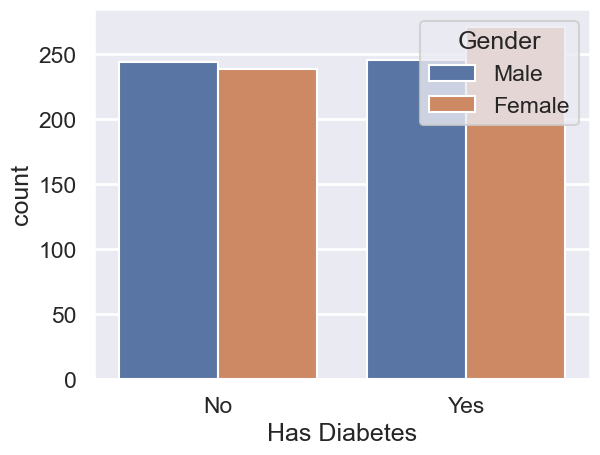

In [389]:
sns.countplot(x = 'Has Diabetes', hue = 'Gender', data = df)
plt.show()

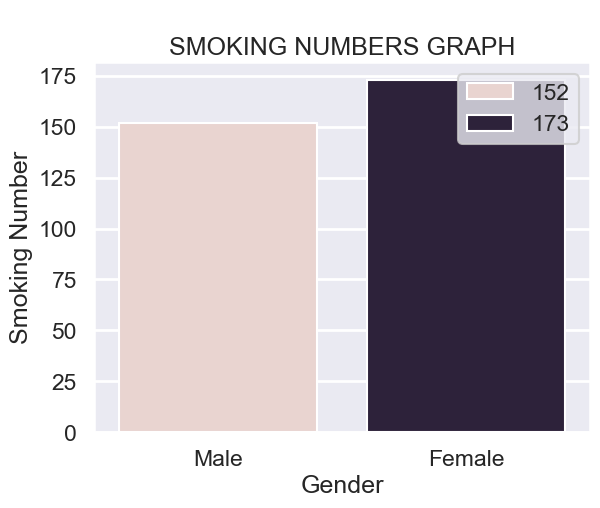

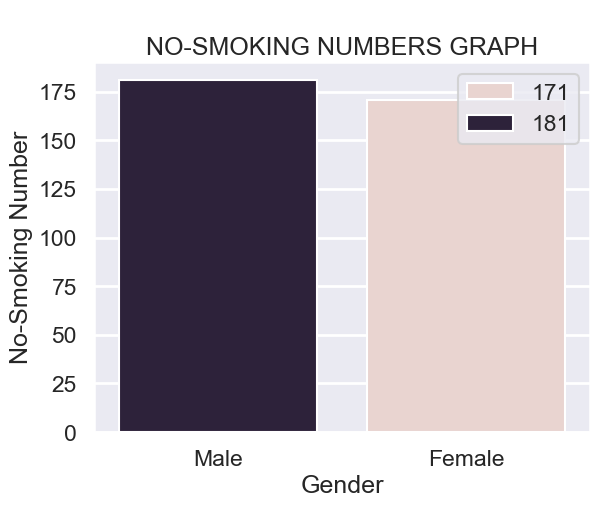

In [390]:
m1 = len(df[(df['Gender'] == 'Male') & (df['Smoking Status'] == 'Current')])
m2 = len(df[(df['Gender'] == 'Male') & (df['Smoking Status'] == 'Never')])
    
f1 = len(df[(df['Gender'] == 'Female') & (df['Smoking Status'] == 'Current')])
f2 = len(df[(df['Gender'] == 'Female') & (df['Smoking Status'] == 'Never')])

data = pd.DataFrame({
    'Gender': ['Male', 'Female'],
    'Smoking': [m1, f1],
    'No Smoking': [m2, f2]
})    

data

sns.barplot(x = 'Gender', y = 'Smoking', hue = 'Smoking', data = data)
plt.ylabel("Smoking Number")
plt.title("\nSMOKING NUMBERS GRAPH")
plt.legend()

plt.show()

sns.barplot(x = 'Gender', y = 'No Smoking', hue = 'No Smoking', data = data)
plt.ylabel("No-Smoking Number")
plt.title("\nNO-SMOKING NUMBERS GRAPH")
plt.legend()

plt.show()

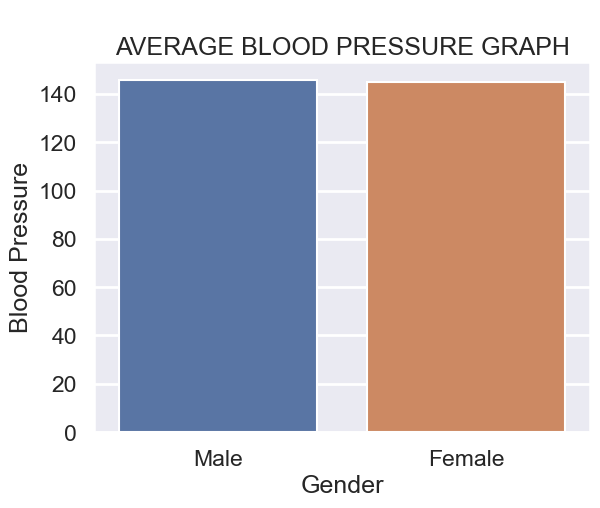

In [391]:
male_BP_Average = round(df[(df['Gender'] == 'Male')]['Blood Pressure (mmHg)'].mean(), 2)
female_BP_Average = round(df[(df['Gender'] == 'Female')]['Blood Pressure (mmHg)'].mean(), 2)

data = pd.DataFrame({
    'Gender': ['Male', 'Female'],
    'Blood Pressure': [male_BP_Average, female_BP_Average]
})

sns.barplot(x = 'Gender', y = 'Blood Pressure', hue = 'Gender', data = data)
plt.title("\nAVERAGE BLOOD PRESSURE GRAPH")

plt.show()

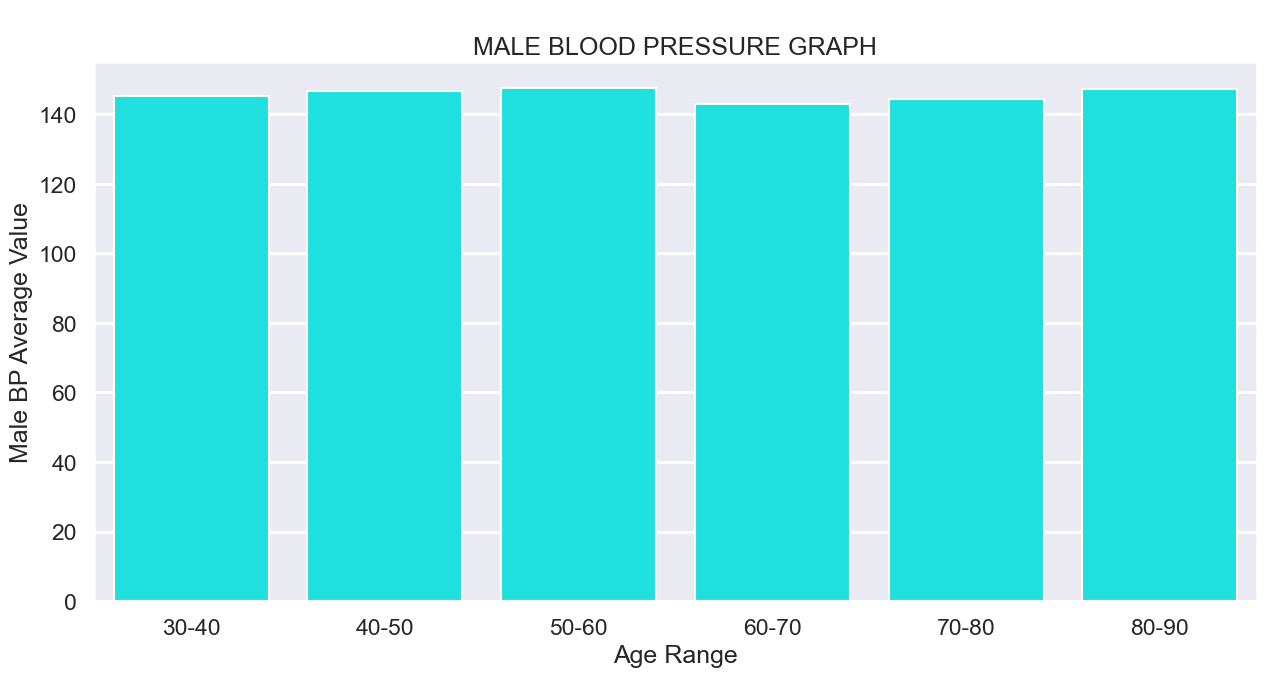

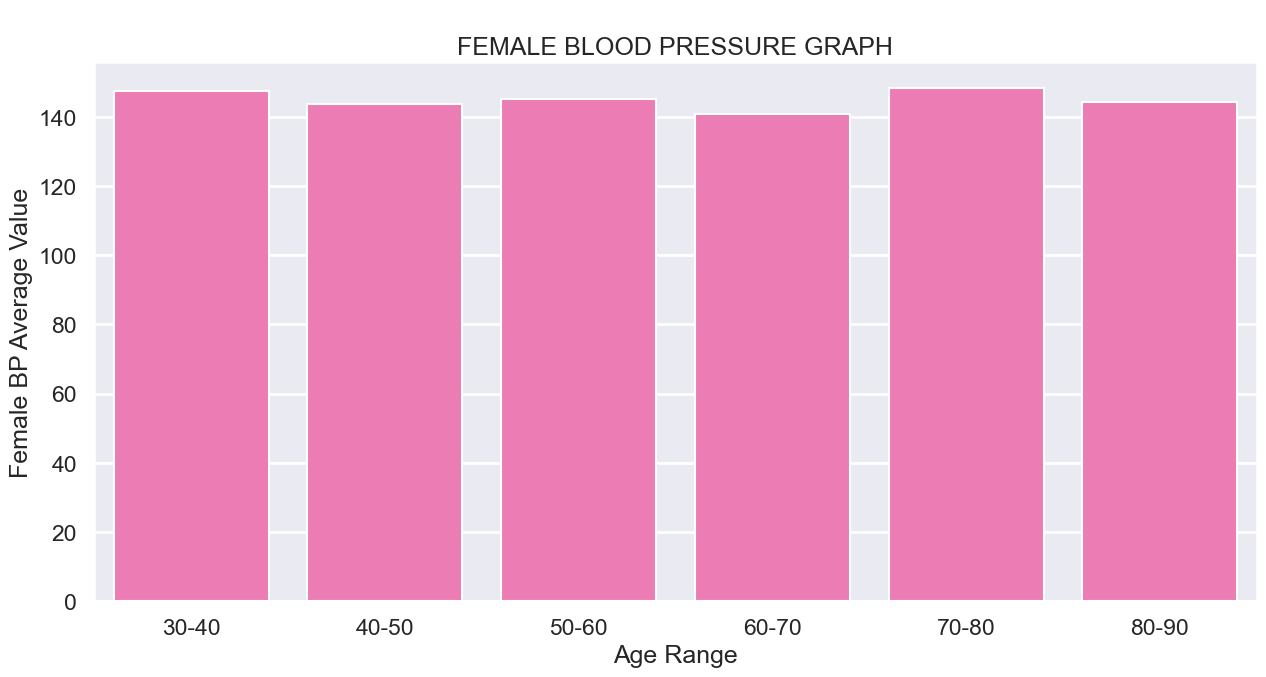

In [392]:
male_BP_Values = []
female_BP_Values = []

for i in range(30,90,10):
    m = round(df[(df['Gender'] == 'Male') & ((df['Age'] >= i) & (df['Age'] < i + 10))]['Blood Pressure (mmHg)'].mean(), 2)
    f = round(df[(df['Gender'] == 'Female') & ((df['Age'] >= i) & (df['Age'] < i + 10))]['Blood Pressure (mmHg)'].mean(), 2)
    male_BP_Values.append(m)
    female_BP_Values.append(f)

data = pd.DataFrame({
    'Age Range': ['30-40', '40-50', '50-60', '60-70', '70-80', '80-90'],
    'Male BP Average Value': male_BP_Values,
    'Female BP Average Value': female_BP_Values
})    

plt.figure(figsize = (15, 7))
sns.barplot(x = 'Age Range', y = 'Male BP Average Value', data = data, color = 'cyan')
plt.title("\nMALE BLOOD PRESSURE GRAPH")
plt.show()

plt.figure(figsize = (15, 7))
sns.barplot(x = 'Age Range', y = 'Female BP Average Value', data = data, color = 'hotpink')
plt.title("\nFEMALE BLOOD PRESSURE GRAPH")
plt.show()

In [398]:
m = []
f = []

for i in range(30,90,3):
    male_value = round(df[(df['Gender'] == 'Male') & ((df['Age'] >= i) & (df['Age'] < i + 10))]['Blood Pressure (mmHg)'].mean(), 2)
    female_value = round(df[(df['Gender'] == 'Female') & ((df['Age'] >= i) & (df['Age'] < i + 10))]['Blood Pressure (mmHg)'].mean(), 2)
    m.append(male_value)
    f.append(female_value)

In [366]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

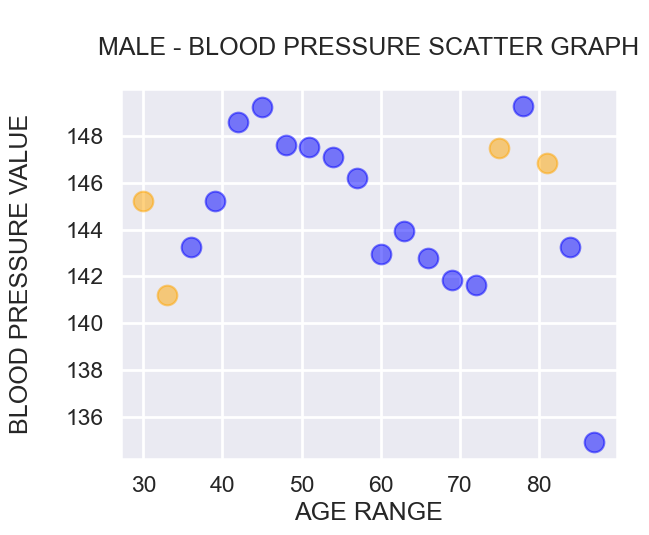

In [399]:
X = np.array(np.arange(30,90,3)).reshape(-1,1)
y = np.array(m)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

model = LinearRegression()

model.fit(X_train, y_train)

prediction = model.predict(X_test)

plt.scatter(X_train, y_train, color = 'blue', alpha = 0.5, s = 200)
plt.scatter(X_test, y_test, color = 'orange', alpha = 0.5, s = 200)
plt.title("\nMALE - BLOOD PRESSURE SCATTER GRAPH\n")
plt.xlabel("AGE RANGE")
plt.ylabel("BLOOD PRESSURE VALUE\n")
plt.show()

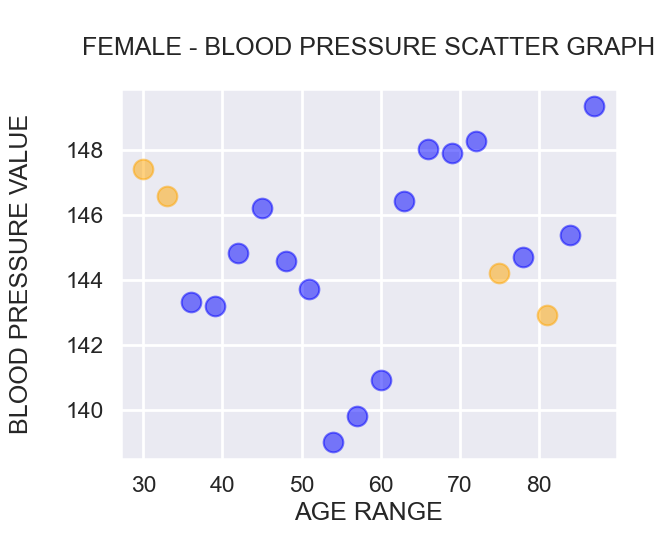

In [400]:
X = np.array(np.arange(30,90,3)).reshape(-1,1)
y = np.array(f)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

model = LinearRegression()

model.fit(X_train, y_train)

prediction = model.predict(X_test)

plt.scatter(X_train, y_train, color = 'blue', alpha = 0.5, s = 200)
plt.scatter(X_test, y_test, color = 'orange', alpha = 0.5, s = 200)
plt.title("\nFEMALE - BLOOD PRESSURE SCATTER GRAPH\n")
plt.xlabel("AGE RANGE")
plt.ylabel("BLOOD PRESSURE VALUE\n")
plt.show()